<a href="https://colab.research.google.com/github/OlgaTihanovich/DataScience/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загружено: 569 строк, 31 столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   mean radius              569 non-null    float64 
 1   mean texture             569 non-null    float64 
 2   mean perimeter           569 non-null    float64 
 3   mean area                569 non-null    float64 
 4   mean smoothness          569 non-null    float64 
 5   mean compactness         569 non-null    float64 
 6   mean concavity           569 non-null    float64 
 7   mean concave points      569 non-null    float64 
 8   mean symmetry            569 non-null    float64 
 9   mean fractal dimension   569 non-null    float64 
 10  radius error             569 non-null    float64 
 11  texture error            569 non-null    float64 
 12  perimeter error          569 non-null    float64 
 13  area error               569 no

/tmp/ipython-input-3424469126.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_vis['class_sp'] = ds_vis['class_sp'].map({'malignant': 0, 'benign': 1})


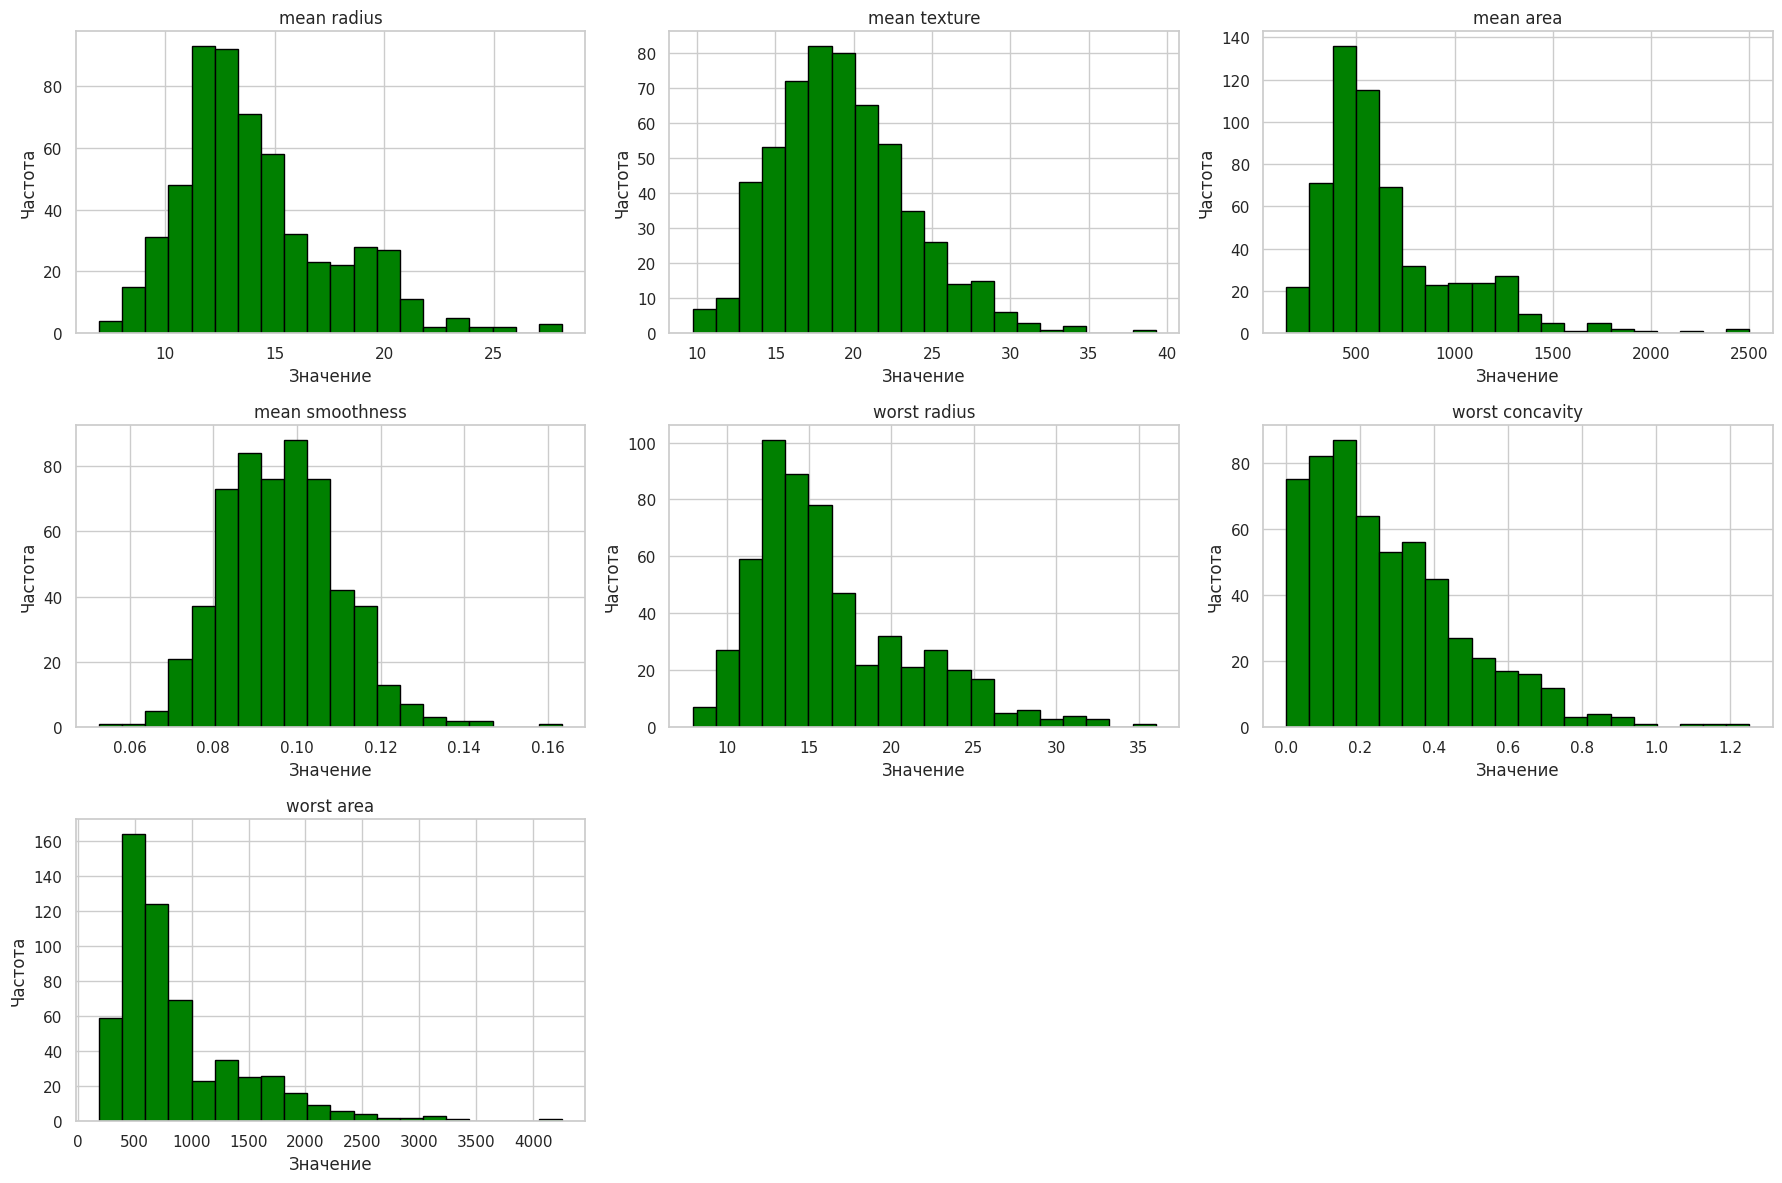

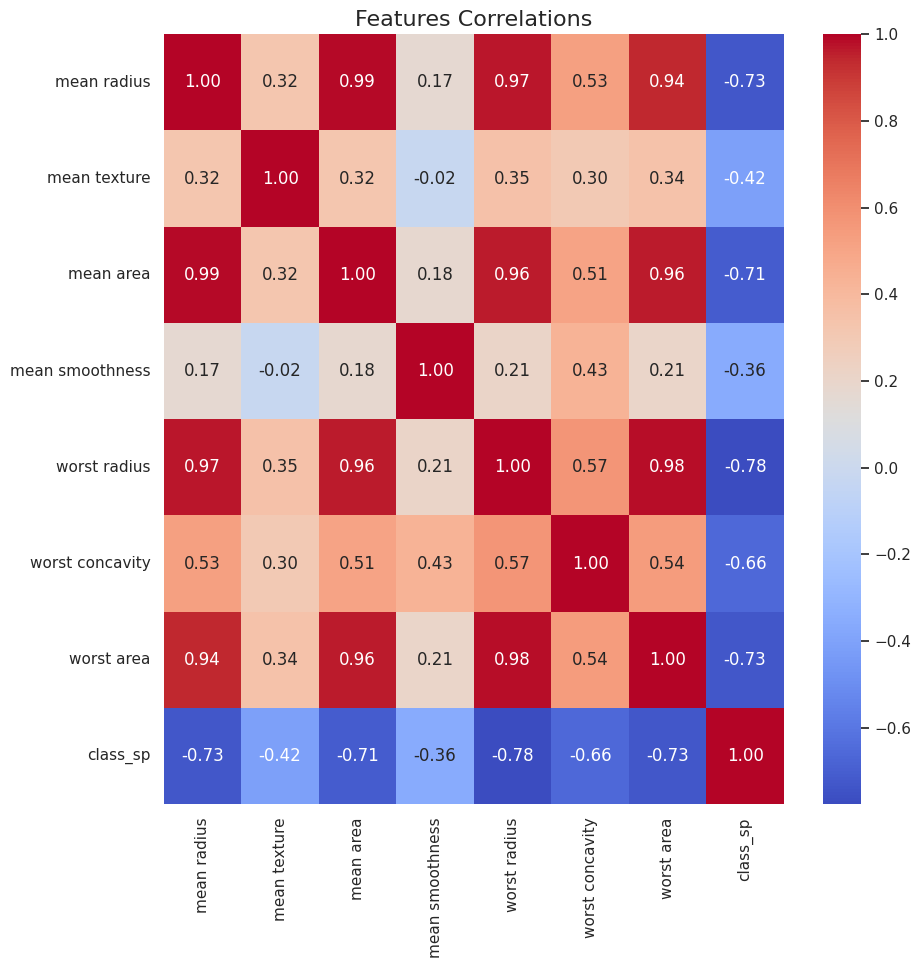

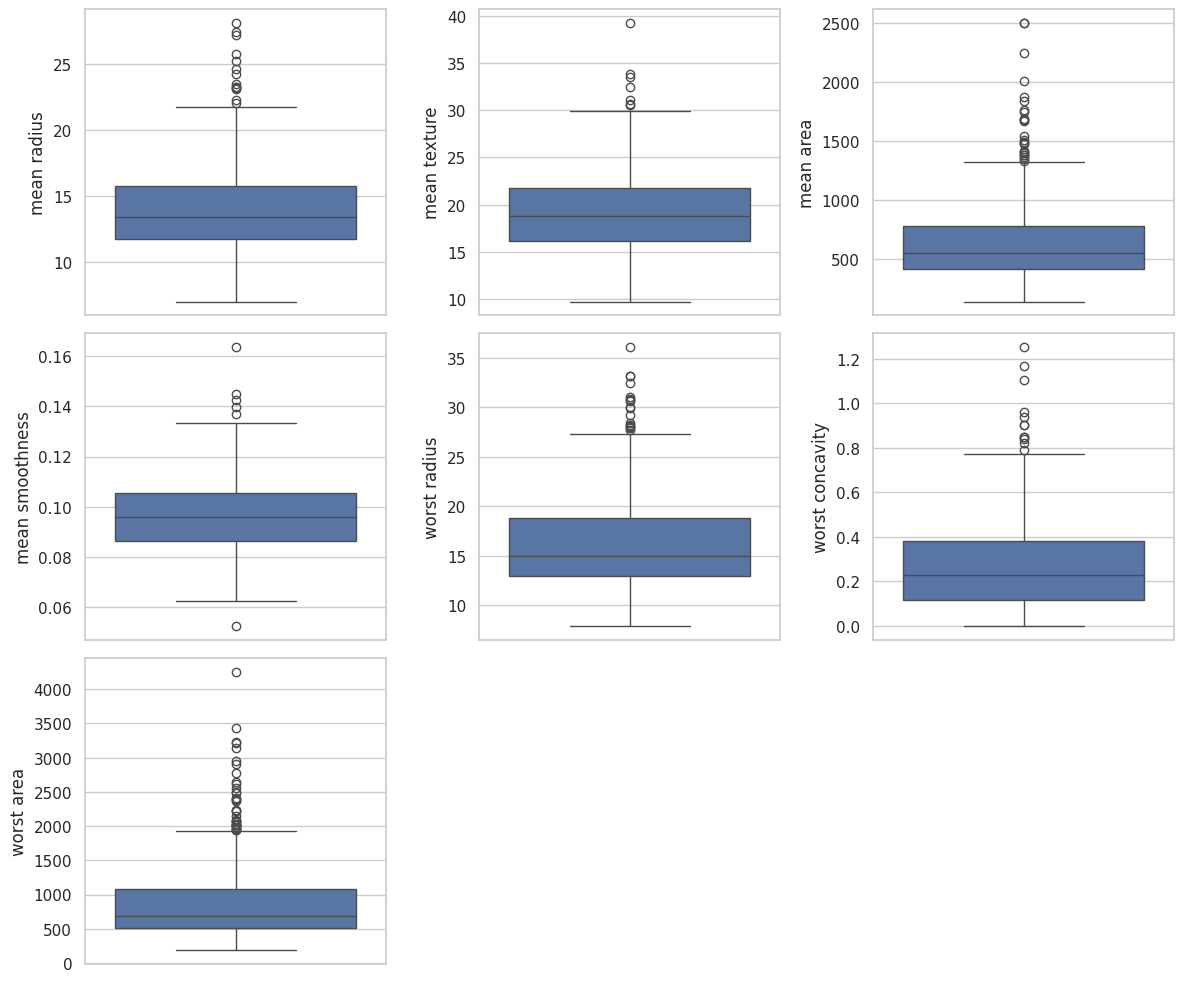

Точность модели: 0.99
Матрица истинности:
[[ 63   1]
 [  1 106]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [91]:
# загрузка датасета
from sklearn.datasets import load_breast_cancer
import pandas as pd
import loader_data as ld
import visualization_data as dv
import preprocessing_data as prd
import train_model as tm
import evaluate_model as ev
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import importlib

importlib.reload(ld)
importlib.reload(dv)
importlib.reload(prd)
importlib.reload(tm)
importlib.reload(ev)

#загрузка данных датасета
canser = load_breast_cancer()

# Загрузка датасета
ds = ld.load_data(canser)

# loading_data.py - загрузка датасета
#Функция для создания DataFrame
def load_data(dataset):

  df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
  df['class_sp'] = pd.Categorical.from_codes(dataset.target,dataset.target_names)

  num_rows=df.shape[0]
  num_columns=df.shape[1]

  if num_rows>0:
    print(f"Загружено: {num_rows} строк, {num_columns} столбцов")
    df.info()
    return df
  else:
    print("Датасет не загрузился")

#dd = load_data(canser)

# preprocessing_data - файл подготовки данных

def data_missing(data):
    cols_with_na = data.columns[data.isnull().any()]

    if len(cols_with_na) == 0:
         print("Пропусков нет")
    else:
         for col in cols_with_na:
           print(f"{col}: {data[col].isnull().sum()} пропусков")

def fill_missing_mean(data):
    df = data.copy()

    for col in df.columns:
        if df[col].isnull().any():
           df[col].fillna(df[col].mean(), inplace=True)

    return df
def count_duplicates(data):
    total_duplicates = data.duplicated().sum()
    print(f"Количество полностью совпадающих строк: {total_duplicates}")


#data_missing(ds)
#count_duplicates(ds)
#fill_missing_mean(ds)

# подготовка данных
prd.data_missing(ds)
prd.count_duplicates(ds)
prd.fill_missing_mean(ds)

#визуализация данных
#выборка значений для визуализации

features = [ 'mean radius', 'mean texture', 'mean area', 'mean smoothness', 'worst radius', 'worst concavity', 'worst area' ]
ds_vis = ds[features + ['class_sp']]
ds_vis['class_sp'] = ds_vis['class_sp'].map({'malignant': 0, 'benign': 1})

dv.hist_visual(ds_vis)
dv.heatmap_visual(ds_vis) #корреляционная матрица
dv.boxplot_visual(ds_vis) #ящики с усами

#обучение модели и результат

X = ds.drop('class_sp', axis=1)
y = ds['class_sp'].map({'malignant': 0, 'benign': 1})

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Обучаем модель
model, scaler = tm.train_model(X_train, y_train, max_iter=200)

# Оцениваем модель
accuracy, cm, cr = ev.evaluate_model(model, scaler, X_test, y_test)
